In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
%cd ./drive/My\ Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
!pip install -q keras

In [0]:
import warnings
warnings.filterwarnings('ignore')

import os 
import numpy as np 
import imutils
from imutils import paths
import random
import cv2
from keras.preprocessing.image import img_to_array
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [0]:
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


In [0]:
imagePaths = sorted(list(paths.list_images('MIZHI')))
random.seed(42)
random.shuffle(imagePaths)

# loop over the input images
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (28, 28))
    image = img_to_array(image)
    data.append(image)
    # extract the class label from the image path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    label = 1 if label == "MVD" else 0
    labels.append(label)

In [0]:
print(imagePaths)

['MIZHI/MVD/car(189).jpeg', 'MIZHI/WA/wa(235).jpg', 'MIZHI/WA/wa(131).jpeg', 'MIZHI/MVD/bike(94).jpeg', 'MIZHI/WA/wa(19).jpeg', 'MIZHI/MVD/truck(102).jpeg', 'MIZHI/WA/wa(262).jpg', 'MIZHI/MVD/bike(76).jpeg', 'MIZHI/MVD/bike(14).jpeg', 'MIZHI/WA/wa(194).jpeg', 'MIZHI/MVD/car(52).jpeg', 'MIZHI/MVD/car(199).jpeg', 'MIZHI/MVD/car(68).jpeg', 'MIZHI/MVD/car(2).jpeg', 'MIZHI/WA/wa(228).jpg', 'MIZHI/MVD/bike(131).jpeg', 'MIZHI/MVD/car(163).jpeg', 'MIZHI/MVD/car(208).jpeg', 'MIZHI/WA/wa(186).jpeg', 'MIZHI/MVD/car(120).jpeg', 'MIZHI/MVD/bike(120).jpeg', 'MIZHI/WA/wa(45).jpeg', 'MIZHI/MVD/bike(21).jpeg', 'MIZHI/MVD/truck(12).jpeg', 'MIZHI/WA/wa(245).jpg', 'MIZHI/MVD/bike(74).jpeg', 'MIZHI/MVD/truck(106).jpeg', 'MIZHI/MVD/car(202).jpeg', 'MIZHI/MVD/bike(96).jpeg', 'MIZHI/MVD/car(27).jpeg', 'MIZHI/MVD/bike(143).jpeg', 'MIZHI/MVD/car(61).jpeg', 'MIZHI/WA/wa(251).jpg', 'MIZHI/WA/wa(143).jpeg', 'MIZHI/MVD/bike(33).jpeg', 'MIZHI/MVD/bike(124).jpeg', 'MIZHI/MVD/truck(95).jpeg', 'MIZHI/WA/wa(83).jpeg', '

In [0]:
print(labels)

[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 

In [0]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [0]:
# partition the data into training and testing splits using 75% of the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [0]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [0]:
from keras import layers
from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)  

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
__________

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=50, batch_size=55)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
644/644 [==============================] - 5s 8ms/step - loss: 0.6754 - acc: 0.6040
Epoch 2/50
644/644 [==============================] - 0s 122us/step - loss: 0.6408 - acc: 0.6366
Epoch 3/50
644/644 [==============================] - 0s 130us/step - loss: 0.5411 - acc: 0.7453
Epoch 4/50
644/644 [==============================] - 0s 114us/step - loss: 0.4738 - acc: 0.7671
Epoch 5/50
644/644 [==============================] - 0s 122us/step - loss: 0.4485 - acc: 0.7997
Epoch 6/50
644/644 [==============================] - 0s 120us/step - loss: 0.4579 - acc: 0.8043
Epoch 7/50
644/644 [==============================] - 0s 115us/step - loss: 0.4012 - acc: 0.8199
Epoch 8/50
644/644 [==============================] - 0s 120us/step - loss: 0.3966 - acc: 0.8106
Epoch 9/50
644/644 [==============================] - 0s 125us/step - loss: 0.3891 - acc: 0.8230
Epoch 10/50
644/644 [==============================] - 0s 124us/step - loss: 0.35

In [0]:
test_loss, test_acc = model.evaluate(testX, testY)

215/215 [==============================] - 0s 480us/step


In [0]:
test_acc

0.8790697674418605

In [0]:
#print(cv2.__version__)
#load the image
image = cv2.imread('MIZHI/test/er.jpg')
orig = image.copy()

In [0]:
image = cv2.resize(image, (28, 28))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [0]:
(WA, MVD) = model.predict(image)[0]

In [0]:
label = "MVD" if MVD > WA else "WA"
proba = MVD if MVD > WA else WA
label = "{}: {:.2f}%".format(label, proba * 100)

In [0]:
# draw the label on the image
output = imutils.resize(orig, width=400)
cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

array([[[ 88,  68,  60],
        [ 86,  67,  60],
        [ 88,  70,  62],
        ...,
        [205, 214, 221],
        [206, 214, 221],
        [208, 216, 223]],

       [[ 89,  68,  62],
        [ 85,  66,  59],
        [ 86,  68,  61],
        ...,
        [211, 216, 222],
        [211, 215, 221],
        [204, 208, 214]],

       [[ 88,  67,  61],
        [ 85,  66,  60],
        [ 85,  66,  60],
        ...,
        [192, 193, 197],
        [169, 167, 172],
        [134, 132, 137]],

       ...,

       [[ 87,  82,  81],
        [ 84,  79,  78],
        [ 87,  82,  81],
        ...,
        [ 78,  73,  72],
        [ 78,  73,  72],
        [ 79,  74,  73]],

       [[ 91,  86,  85],
        [ 94,  89,  88],
        [ 87,  82,  81],
        ...,
        [ 75,  70,  69],
        [ 78,  73,  72],
        [ 75,  70,  69]],

       [[ 90,  85,  84],
        [ 90,  85,  84],
        [ 86,  81,  80],
        ...,
        [ 85,  80,  79],
        [ 79,  74,  73],
        [ 79,  74,  73]]

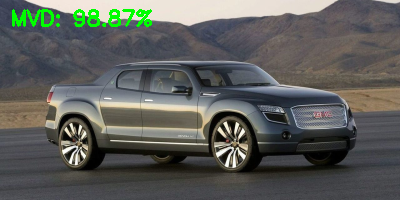

-1

In [0]:
# show the output image
from google.colab.patches import cv2_imshow
cv2_imshow(output)
cv2.waitKey(0)

In [0]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model

with open("mizhi.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("mizhi.h5")
print("Saved model to disk")

Saved model to disk
